# PYTHON SKLEARN: KNN, LinearRegression et SUPERVISED LEARNING (20/30)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
titanic = pd.read_excel('titanic.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Régression avec Sklearn

In [4]:
np.random.seed(0)
m = 100 # creating 100 samples
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

In [5]:
# sélection d'un estimateur (type d'algo de ML) et préciser ses hyperparamètres
model = LinearRegression()

# entrainement du modèle sur des données X, y
model.fit(X, y)

# évaluation du modèle --> coefficient de détermination R²
model.score(X, y)

# utilisation du modèle pour une prédiction
predictions = model.predict(X)

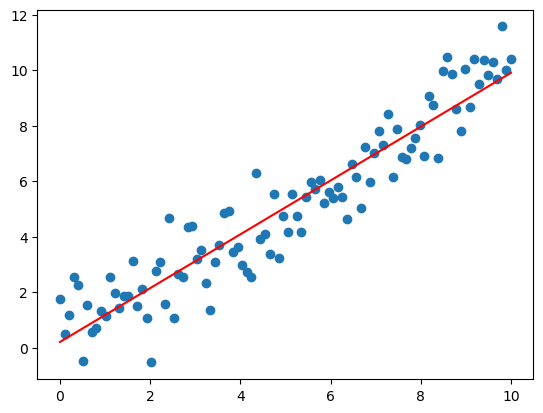

In [6]:
plt.scatter(X, y)
plt.plot(X, predictions, c='red')

## Modèle de classification KNN

In [7]:
from warnings import simplefilter
simplefilter(action='ignore')

In [8]:
# on convertie les string en nombre pour pouvoir faire du Machine Learning
titanic = titanic[['survived', 'pclass', 'sex', 'age']].dropna(axis=0).reset_index(drop=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,0,1,1,2.0000
3,0,1,0,30.0000
4,0,1,1,25.0000


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier()

In [11]:
# ce qu'on veut prédire y
y = titanic['survived']
# nos données d'entrainement
X = titanic.drop(columns='survived', axis=1)

In [12]:
# entrainement du modèle
model.fit(X, y)
# le R², la proportion de réussite pour le modèle
model.score(X, y)

0.8317399617590823

In [13]:
# fonction qui détermine si on va survivre au naufrage du titanic et qui donne les probabilités de survivre ou non
def survie(model, pclass=3, sex=0, age=27):
    x=np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [14]:
# utilisation de la fonction survie
survie(model)

[0]
[[0.6 0.4]]


### Variation de l'hyperparamètre n_neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

# ce qu'on veut prédire y
y = titanic['survived']
# nos données d'entrainement
X = titanic.drop(columns='survived', axis=1)

# entrainement du modèle
model.fit(X, y)
# le R², la proportion de réussite pour le modèle
model.score(X, y)

# plus le score est élevé, plus le modèle est bon 

0.8001912045889101

In [16]:
liste_R_squared = []

for n in range(1,11):
    
    model = KNeighborsClassifier(n_neighbors=n)

    # ce qu'on veut prédire y
    y = titanic['survived']
    # nos données d'entrainement
    X = titanic.drop(columns='survived', axis=1)

    # entrainement du modèle
    model.fit(X, y)
    # le R², la proportion de réussite pour le modèle
    print('Pour n_neighbors = ', n, ', R² = ', model.score(X, y))
    
    # ajout de tous les R² à une liste pour les comparer
    liste_R_squared.append(model.score(X, y))

print("Pour R² variant de 1 à 10, le R² max est de", max(liste_R_squared),
     ', pour n_neighbors = ', liste_R_squared.index(max(liste_R_squared))+1)

Pour n_neighbors =  1 , R² =  0.8097514340344169
Pour n_neighbors =  2 , R² =  0.8279158699808795
Pour n_neighbors =  3 , R² =  0.8451242829827916
Pour n_neighbors =  4 , R² =  0.8298279158699808
Pour n_neighbors =  5 , R² =  0.8317399617590823
Pour n_neighbors =  6 , R² =  0.8240917782026769
Pour n_neighbors =  7 , R² =  0.8164435946462715
Pour n_neighbors =  8 , R² =  0.8126195028680688
Pour n_neighbors =  9 , R² =  0.8107074569789675
Pour n_neighbors =  10 , R² =  0.8001912045889101
Pour R² variant de 1 à 10, le R² max est de 0.8451242829827916 , pour n_neighbors =  3


# PYTHON SKLEARN - MODEL SELECTION : Train_test_split, Cross Validation, GridSearchCV (21/30)

In [17]:
from sklearn.datasets import load_iris

(150, 4)


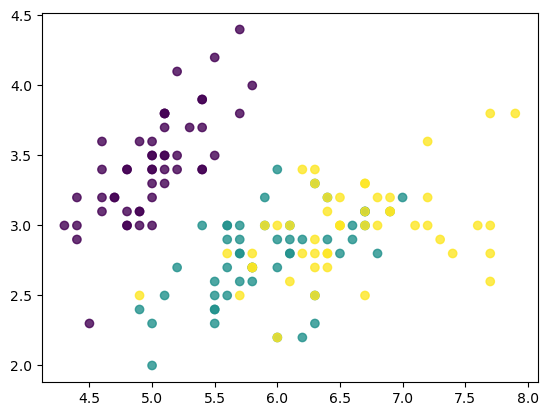

In [18]:
iris = load_iris()

# features
X = iris.data

# variété de fleurs d'iris --> target en fonction des features
y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [19]:
from sklearn.model_selection import train_test_split

# divise le dataset en données d'entrainement et de test, 80% pour l'entrainement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

print("train_set :", X_train.shape)
print("test_set :", X_test.shape)

train_set : (120, 4)
test_set : (30, 4)


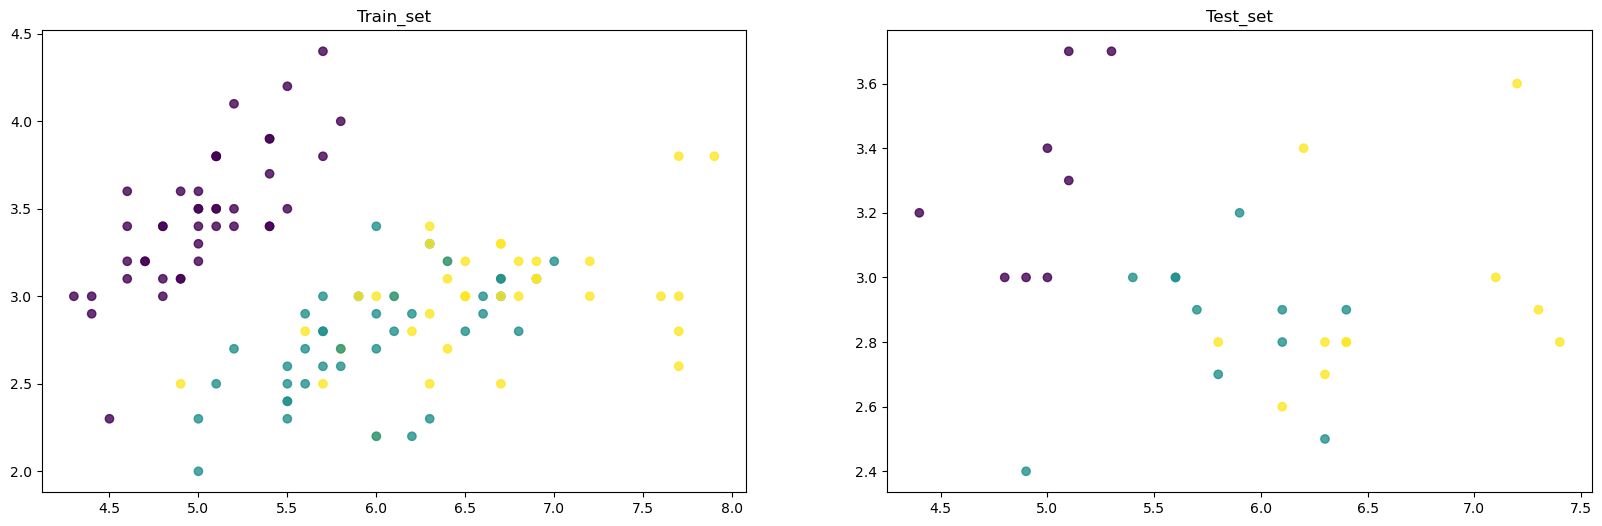

In [20]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Train_set')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)

plt.subplot(1,2,2)
plt.title('Test_set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

# entrainement du modèle sur le train set
model.fit(X_train, y_train)
# le R², la proportion de réussite pour le modèle
# on évalue le modèle sur le test set, ou le val set
model.score(X_test, y_test)

0.9

### Amélioration du modèle

In [22]:
def hyper_param(X_train, y_train, X_test, y_test, start_range, end_range):

    liste_R_squared = []

    for n in range(start_range,end_range):

        model = KNeighborsClassifier(n_neighbors=n)

        # entrainement du modèle
        model.fit(X_train, y_train)
        # le R², la proportion de réussite pour le modèle
        print('Pour n_neighbors = ', n, ', R² = ', model.score(X_test, y_test))

        # ajout de tous les R² à une liste pour les comparer
        liste_R_squared.append(model.score(X_test, y_test))

    print(f"Pour R² variant de {start_range} à {end_range}, le R² max est de", max(liste_R_squared),
         ', pour n_neighbors = ', liste_R_squared.index(max(liste_R_squared))+1)

In [23]:
hyper_param(X_train, y_train, X_test, y_test, start_range=1, end_range=10)

Pour n_neighbors =  1 , R² =  0.9
Pour n_neighbors =  2 , R² =  0.9
Pour n_neighbors =  3 , R² =  0.9333333333333333
Pour n_neighbors =  4 , R² =  0.9333333333333333
Pour n_neighbors =  5 , R² =  0.9333333333333333
Pour n_neighbors =  6 , R² =  0.9666666666666667
Pour n_neighbors =  7 , R² =  0.9666666666666667
Pour n_neighbors =  8 , R² =  1.0
Pour n_neighbors =  9 , R² =  0.9666666666666667
Pour R² variant de 1 à 10, le R² max est de 1.0 , pour n_neighbors =  8


### Cross validation

Test les combinaisons de datasets d'entrainement, de validation et de test pour avoir le meilleur modèle

In [24]:
from sklearn.model_selection import cross_val_score

In [62]:
# on passe le modèle, les données d'entrainement, le nombre de split, le métrique
# on obtient 5 score, 1 par split, on peut en faire la moyenne
cross_val_score(KNeighborsClassifier(5), X_train, y_train, cv=5, scoring='accuracy')

array([0.79166667, 0.70658683, 0.73053892, 0.74850299, 0.80838323])

4


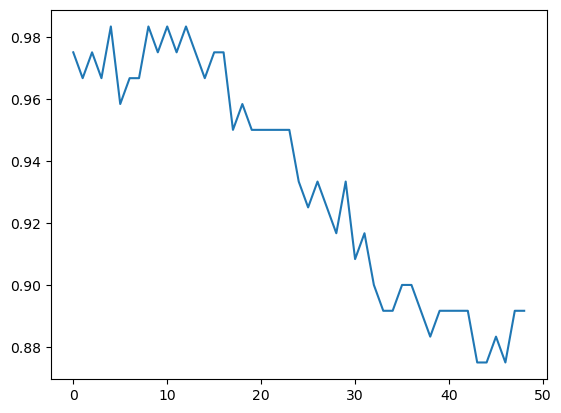

In [26]:
B=[]
for n in range(1,50):
    A = cross_val_score(KNeighborsClassifier(n), X_train, y_train, cv=5, scoring='accuracy').mean()
    B.append(A)
plt.plot(B)
print(B.index(max(B)))

### Validation curve, pour créer le genre de courbe vu juste avant

In [27]:
from sklearn.model_selection import validation_curve

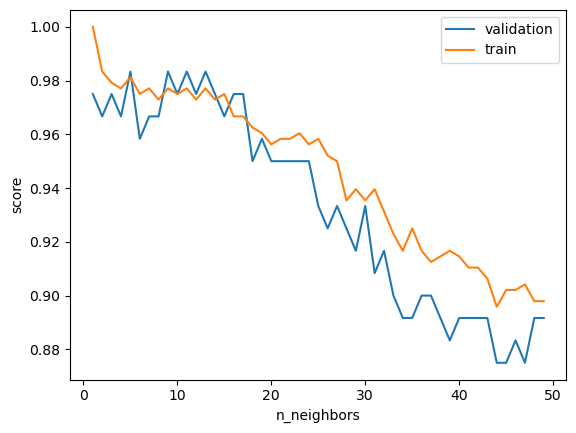

In [28]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### Grid Search Cv pour déterminer chacun des meilleurs hyperparamètres

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# les hyperparamètres pour un estimateur donné, ici pour un KNeighborsClassifier
param_grid = { 'n_neighbors' : np.arange(1,20),
             'metric' : ['euclidean', 'manhattan']}

# on crée le grid comme un modèle
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) # cv nombre de split

# on entraine notre grid, càd notre grille de modèle
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [31]:
# modèle qui a eu le meilleur score, ici le meilleur R²
grid.best_score_

0.9833333333333334

In [32]:
# les meilleurs paramètres
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [33]:
# sauvegarde du meilleur modèle
model = grid.best_estimator_

In [34]:
# score du modèle avec les données de test
model.score(X_test, y_test)

0.9333333333333333

#### Pour savoir ou sont les erreurs dans les prédictions

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
# les données de test en ligne, les données de prédiction en colonnes
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

2 erreurs ici, 2 fleurs de la catégories 2 ont été mises dans la catégorie 3

### Courbe d'apprentissage du modèle, doit on lui fournir d'autres données

In [37]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


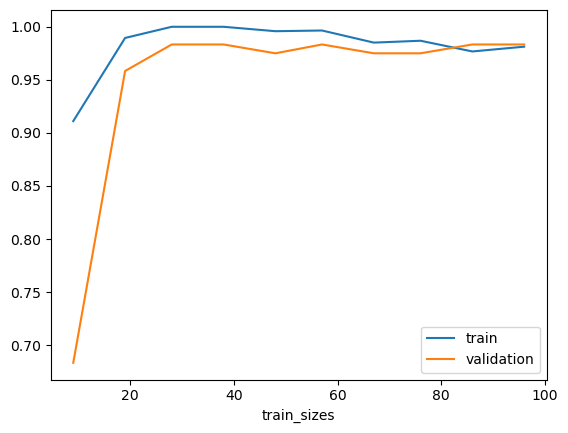

In [38]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend();

### Exercice du titanic, mise en pratique

In [39]:
X = titanic.drop(columns='survived')
y = titanic['survived']

#### Train_test_split

In [40]:
# création données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
print('X_train_shape :',X_train.shape)
print('X_test_shape :',X_test.shape)
print('y_train_shape :',y_train.shape)
print('y_test_shape :',y_test.shape)

X_train_shape : (836, 3)
X_test_shape : (210, 3)
y_train_shape : (836,)
y_test_shape : (210,)


In [42]:
# création d'un premier modèle basique
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7285714285714285

#### Cross_validation

In [43]:
# cross validation, split en 5 le dataset avec données de validation en plus
# cv : nombre de découpe, le train set est découpé en 5 parties et le score de chaque split est évalué en changeant à chaque
# fois l'échantillon de validation
# on fait la manip est changeant les hyperparamètres pour trouver la meilleur configuration

from sklearn.model_selection import cross_val_score

cross_val_score(KNeighborsClassifier(5), X_train, y_train, cv=5, scoring='accuracy').mean()

0.7571357285429142

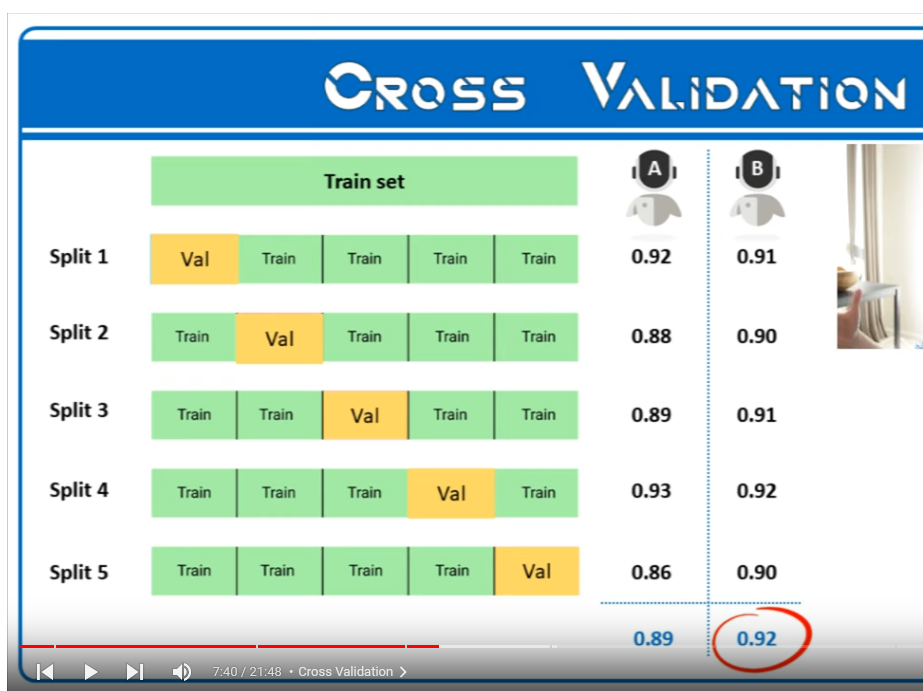

0.7643641288850869
3


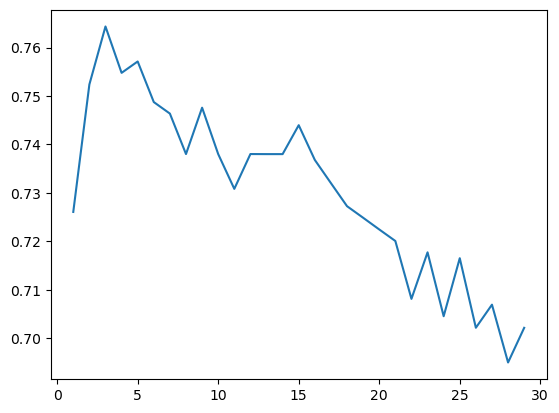

In [44]:
# meilleur score du modèle avec nombre de n_neighbors associé
B = []
for n in range(1,30):    
    A = cross_val_score(KNeighborsClassifier(n), X_train, y_train, cv=5, scoring='accuracy').mean()
    B.append(A)
plt.plot(range(1,30),B)
print(max(B))
print(B.index(max(B))+1)

#### Validation curve

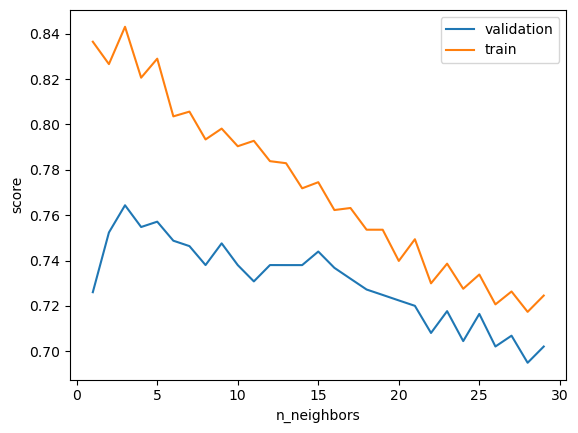

In [45]:
# Courbes qui va indiquer les meilleurs performances du modèle en faisant varier un hyperparamètre ici n_neighbors

from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
k = np.arange(1, 30)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

Si l'écart entre le train set et le validation set est trop grand, cela signifie que le train set est en overfitting, qu'il est trop entrainé. Dans ce type de modèle, cela est souvent présent pour n_neighbors=1.

#### GridSearchCV

In [46]:
# utilisation de GridSearch pour trouver le meilleur modèle
from sklearn.model_selection import GridSearchCV

# les hyperparamètres pour un estimateur donné, ici pour un KNeighborsClassifier
param_grid = { 'n_neighbors' : np.arange(1,20),
              'weights' : ['uniform', 'distance'],
             'metric' : ['euclidean', 'manhattan', 'canberra']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

print("Score meilleur modèle : ", grid.best_score_)

print("Paramètre meilleur modèle : ",grid.best_params_)

model = grid.best_estimator_

Score meilleur modèle :  0.7942757342457941
Paramètre meilleur modèle :  {'metric': 'canberra', 'n_neighbors': 16, 'weights': 'uniform'}


In [47]:
# utilisation du modèle sur les données de test
model.score(X_test, y_test)

0.7952380952380952

#### Confusion_matrix

In [48]:
from sklearn.metrics import confusion_matrix

# les données de test en ligne, les données de prédiction en colonnes
confusion_matrix(y_test, model.predict(X_test))

array([[114,   8],
       [ 35,  53]], dtype=int64)

#### Learning_curve

[ 66 133 200 267 334 400 467 534 601 668]


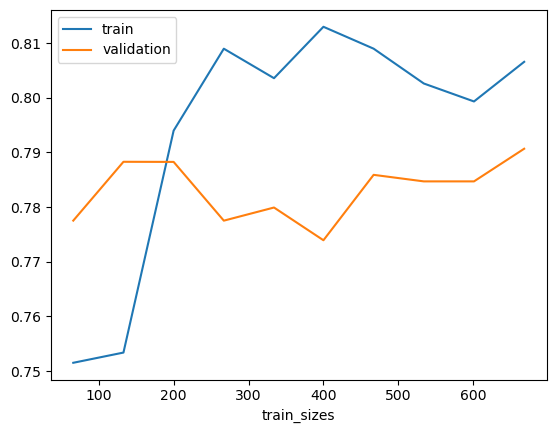

In [49]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend();

# CROSS-VALIDATION SKLEARN PYTHON Video 21.1
Les types de cross validation

In [50]:
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, GroupKFold

#### KFold
Méthode la plus utilisée : n split égaux et n tests
A tout de rôle, un des split devient le validation test
On mesure le score dans chacune des configurations et on garde la meilleur
Peut poser pb pour les modèles de classification --> mauvaise répartition des classes et désequilibrage

In [51]:
# n_split égaux
cv = KFold(n_splits=5)
cross_val_score(KNeighborsClassifier(), X_train, y_train,  cv=cv)

array([0.78571429, 0.74251497, 0.73652695, 0.76047904, 0.79640719])

#### LeaveOneOut : autant de sous échantillon dans le train set que de ligne
N'est possible que pour un petit échantillon, extrêmement gourmand en puissance de calcul

In [52]:
cv = LeaveOneOut()
cross_val_score(KNeighborsClassifier(), X_train, y_train,  cv=cv).mean()

0.7452153110047847

#### ShuffleSplit
Les individus de chaque échantillon changent à chaque fois
Si on a 80% train set 20% validation set et qu'on teste 5 fois, à chacun des tests on mélange tout le dataset de train et on compose aléatoirement le train set et le validation set.
Peut poser pb pour les modèles de classification --> mauvaise répartition des classes et désequilibrage

In [53]:
cv = ShuffleSplit(4, test_size=0.2)
cross_val_score(KNeighborsClassifier(), X_train, y_train,  cv=cv)

array([0.74404762, 0.69642857, 0.78571429, 0.73214286])

#### StratifiedKFold
Adapté au pb de classification
Créé n split équilibré avec la même proportion de chaque classe dans chaque split

In [54]:
cv = StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(), X_train, y_train,  cv=cv)

array([0.73684211, 0.72727273, 0.71770335, 0.77511962])

#### GroupKFold
Utilisé si les données dépendent les unes des autres, si elles sont liées entre elles

In [55]:
cv = GroupKFold(5).get_n_splits(X, y, groups='pclass')
cross_val_score(KNeighborsClassifier(), X_train, y_train,  cv=cv)

array([0.79166667, 0.70658683, 0.73053892, 0.74850299, 0.80838323])

# MÉTRIQUES de RÉGRESSIONS en DATA SCIENCE (Coefficient de Détermination, Erreur Quadratique, etc... ) Video 21.2
Les types de métriques de régression

In [56]:
from sklearn.metrics import *

In [57]:
y = np.array([1,2,2,3,5])
y_pred = np.array([5,2,3,2,3])

print("MAS :", mean_absolute_error(y, y_pred)) # erreur absolue
print("MSE :", mean_squared_error(y, y_pred)) # erreur quadratique
print("RMSE :", np.sqrt(mean_squared_error(y, y_pred)))
print("median abs err :", median_absolute_error(y, y_pred))

MAS : 1.6
MSE : 4.4
RMSE : 2.0976176963403033
median abs err : 1.0


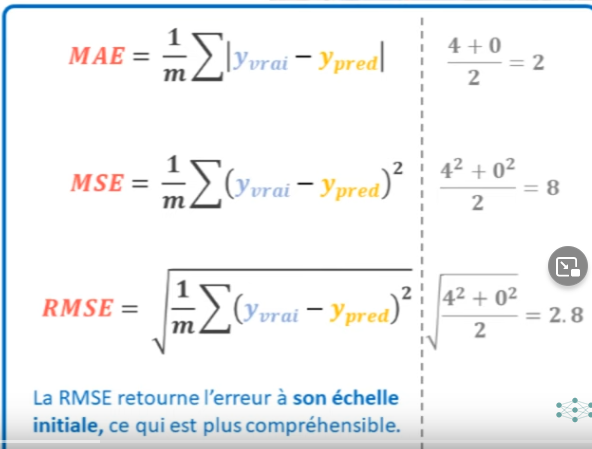

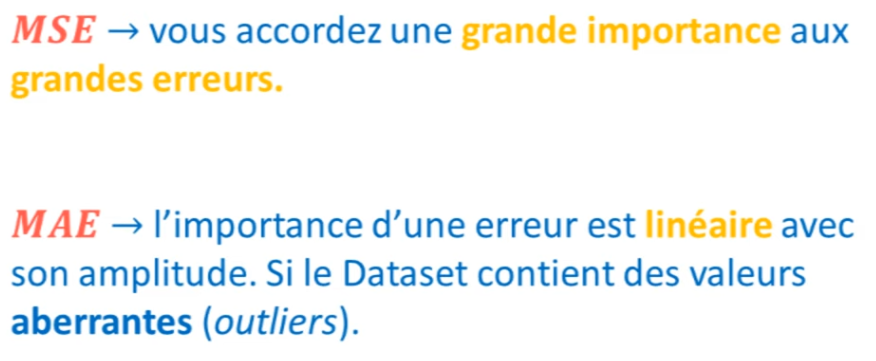

Une autre métrique intéressante : l'histogramme des erreurs pour évaluer la distribution des erreurs de mon modèle

0.7406426641094095


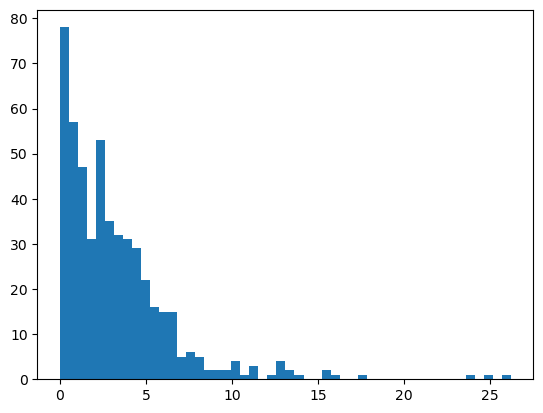

In [58]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
X = boston.data
y = boston.target

model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
y_pred = model.predict(X)

err_hist = np.abs(y-y_pred)
plt.hist(err_hist, bins = 50)
plt.show()

#### Coefficient de détermination R²

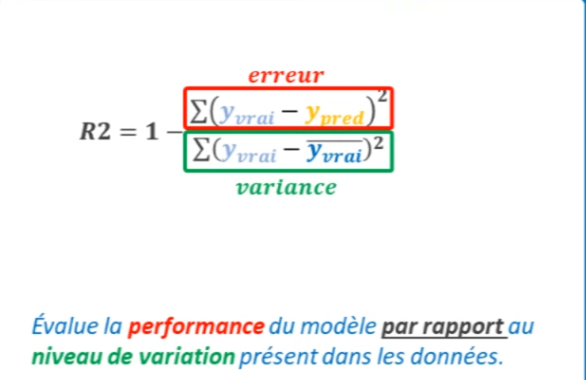

#### Liste des métriques

In [59]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# Sklearn make_scorer tutoriel : Créer vos propres métriques.Video 21.3

In [60]:
def my_mean_absolute_error(y, y_pred):
    return np.abs(y-y_pred).sum()/y.size

# import de make_scorer pour faire ses metriques
from sklearn.metrics import make_scorer

# creation metric
custom_mean_absolute_error = make_scorer(my_mean_absolute_error, greater_is_better=False)

from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), X, y, cv=3, scoring = custom_mean_absolute_error)

array([ -3.32352337,  -4.27948547, -13.47752829])

In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1046 non-null   int64  
 1   pclass    1046 non-null   int64  
 2   sex       1046 non-null   int64  
 3   age       1046 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 32.8 KB
